In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xls = pd.ExcelFile('matrices_conf.xlsx')

cm_AB = pd.read_excel(xls, 'AB').drop(['Unnamed: 0'], axis=1)
cm_BC = pd.read_excel(xls, 'BC').drop(['Unnamed: 0'], axis=1)
cm_CA = pd.read_excel(xls, 'CA').drop(['Unnamed: 0'], axis=1)
cm_ABC = pd.read_excel(xls, 'ABC').drop(['Unnamed: 0'], axis=1)
cm_AG = pd.read_excel(xls, 'AG').drop(['Unnamed: 0'], axis=1)
cm_BG = pd.read_excel(xls, 'BG').drop(['Unnamed: 0'], axis=1)
cm_CG = pd.read_excel(xls, 'CG').drop(['Unnamed: 0'], axis=1)
cm_todas = pd.read_excel(xls, 'Todas').drop(['Unnamed: 0'], axis=1)

fallas = ['All', 'AB', 'BC', 'CA', 'ABC', 'AG', 'BG', 'CG']
cms = [cm_todas, cm_AB, cm_BC, cm_CA, cm_ABC, cm_AG, cm_BG, cm_CG]

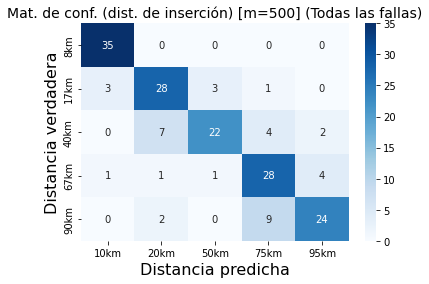

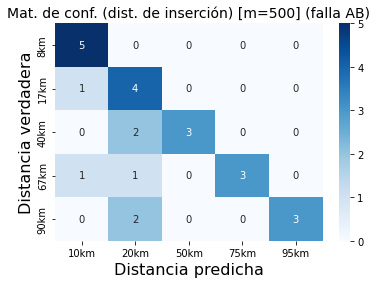

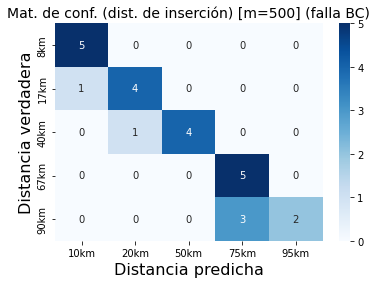

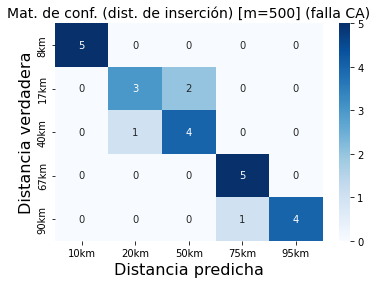

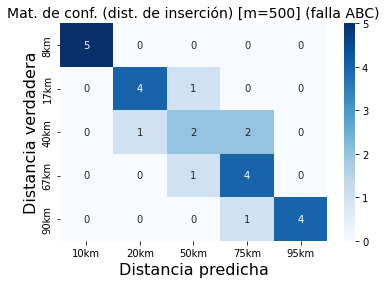

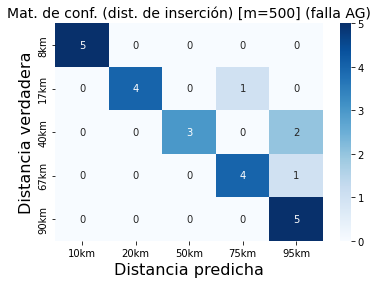

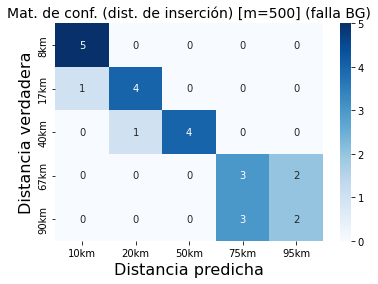

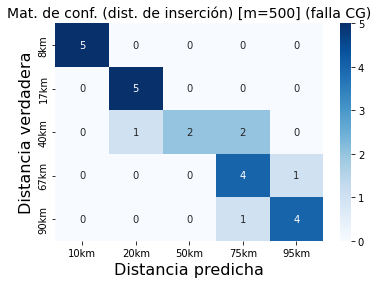

In [8]:
otras_distancias = ['8km', '17km', '40km', '67km', '90km']
distancias = ['10km', '20km', '50km', '75km', '95km']

for i in range(len(cms)):
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(cms[i], annot=True, fmt='g', ax=ax, cmap="Blues")
    # labels, title and ticks
    ax.set_xlabel('Distancia predicha', fontsize=16)
    ax.set_ylabel('Distancia verdadera', fontsize=16)
    if fallas[i] == 'All':
        ax.set_title(f'Mat. de conf. (dist. de inserción) [m=500] (Todas las fallas)', fontsize=14)
    else:
        ax.set_title(f'Mat. de conf. (dist. de inserción) [m=500] (falla {fallas[i]})', fontsize=14)
    ax.xaxis.set_ticklabels(distancias)
    ax.yaxis.set_ticklabels(otras_distancias)
    # plt.show()
    if fallas[i] == 'All':
        plt.savefig(f'una_ventana/grafs_y_cms/espa/cm_other_dists_all.eps', format='eps')
    else:
        plt.savefig(f'una_ventana/grafs_y_cms/espa/cm_other_dists_{fallas[i]}.eps', format='eps')

Accuracy for fault All: 0.783
Accuracy for fault AB: 0.72
Accuracy for fault BC: 0.8
Accuracy for fault CA: 0.84
Accuracy for fault ABC: 0.76
Accuracy for fault AG: 0.84
Accuracy for fault BG: 0.72
Accuracy for fault CG: 0.8


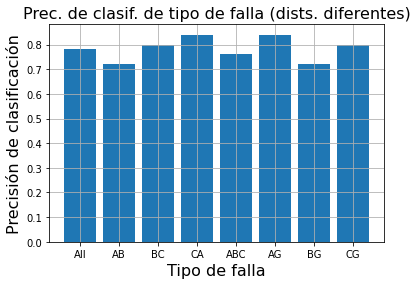

In [9]:
def calc_accuracy(cm):
    diagonal = [cm['10km'][0], cm['20km'][1], cm['50km'][2], cm['75km'][3], cm['95km'][4]]
    if cm['10km'][0] > 5:
        accuracy = np.sum(diagonal)/(175)
    else:
        accuracy = np.sum(diagonal)/(25)
    return accuracy

accs = []
for i in range(len(cms)):
    acc = np.round(calc_accuracy(cms[i]), 3)
    accs.append(acc)
    print(f'Accuracy for fault {fallas[i]}: {acc}')

plt.figure()
plt.bar(fallas, accs)
plt.grid()
plt.ylabel('Precisión de clasificación', fontsize=16)
plt.xlabel('Tipo de falla', fontsize=16)
plt.title('Prec. de clasif. de tipo de falla (dists. diferentes)', fontsize=16)
plt.savefig(f'una_ventana/grafs_y_cms/espa/facc_other_dists.eps', format='eps')